# Pallavi P Bolar

## Task 2 - Create the Decision Tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier, it should be able to
predict the right class accordingly. 

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading data stored in the same folder as this file
df = pd.read_csv('Iris.csv',index_col=0)

In [3]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [4]:
df.isnull().sum() 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

###### There's no missing data

In [5]:
# shows the statisical information of the numerical columns present in the dataframe
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

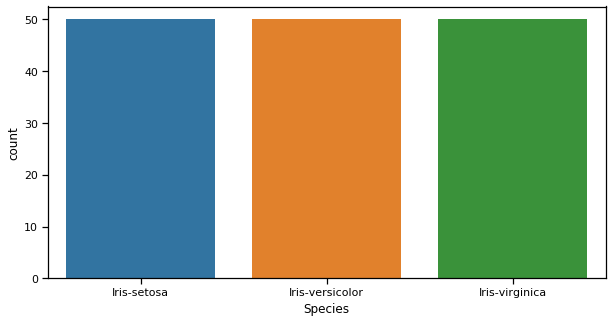

In [6]:
plt.figure(figsize=(10,5))
sns.set_context('notebook')
sns.countplot(df['Species'])

###### We can say that the data is balanced beacuse the number of target classes are equal i.e 50  each

In [7]:
#To check the correlation between the variables
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


###### Since PetalLengthCm and PetalWidthCm have the highest correlation. We'll visualize it next

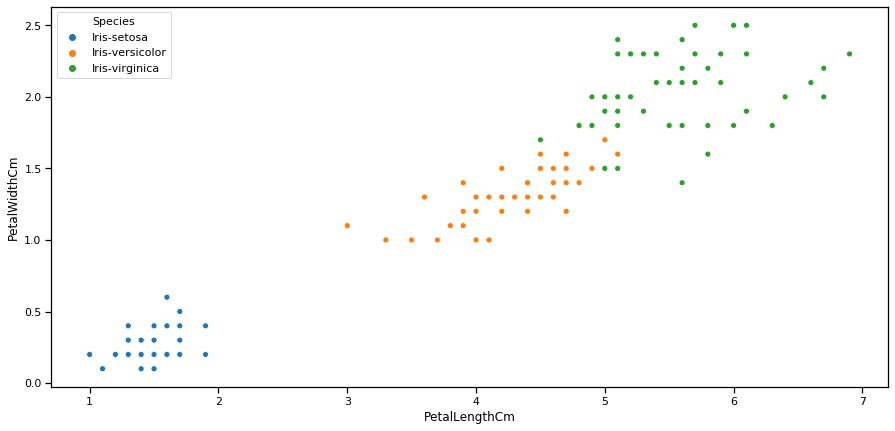

In [8]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = df, x='PetalLengthCm', y='PetalWidthCm', hue = 'Species')

#### Petals of Iris Setosa tend to be smaller in size than Versicolor and Virginica. Hence it can be differentiated easily

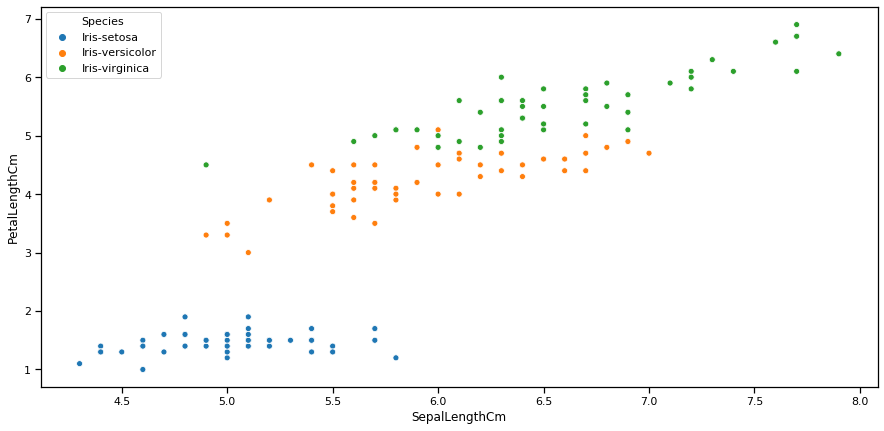

In [9]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = df, x='SepalLengthCm', y='PetalLengthCm', hue = 'Species')

In [10]:
df.groupby('Species').mean()[['SepalLengthCm','SepalWidthCm']]

,SepalLengthCm,SepalWidthCm
Species,,
Iris-setosa,5.006,3.418
Iris-versicolor,5.936,2.770
Iris-virginica,6.588,2.974


###### There's not much difference in the Sepal length and width of the Iris flower species

## Training the Model

In [11]:
def target(s):
    if s == 'Iris-setosa':
        return 0
    elif s == 'Iris-versicolor':
        return 1
    else:
        return 2
    
df['Target'] = df['Species'].apply(target)

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,0
2,4.9,3.0,1.4,0.2,Iris-setosa,0
3,4.7,3.2,1.3,0.2,Iris-setosa,0
4,4.6,3.1,1.5,0.2,Iris-setosa,0
5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [13]:
df.columns[:-2]

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [14]:
X=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=df['Target']

In [15]:
X.shape

(150, 4)

In [16]:
y.shape

(150,)

In [17]:
from sklearn import tree
dc = tree.DecisionTreeClassifier()

In [18]:
dc.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Decision Tree Visualization

In [19]:
import graphviz
dot_data = tree.export_graphviz(dc,out_file=None,feature_names = df.columns[:-2], class_names= df['Species'].unique(), filled = True)
graph = graphviz.Source(dot_data)

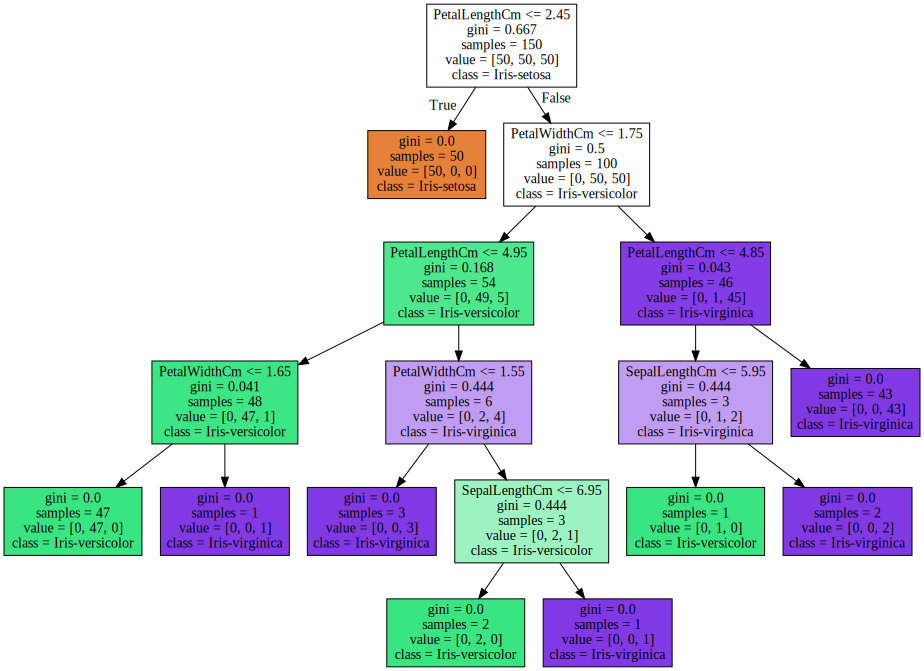

In [20]:
graph

### Predicting data

In [21]:
#This is the 121st row of the datframe 
df.iloc[121]

SepalLengthCm               5.6
SepalWidthCm                2.8
PetalLengthCm               4.9
PetalWidthCm                  2
Species          Iris-virginica
Target                        2
Name: 122, dtype: object

In [22]:
#We'll pass this data to our model to see if it predicts the target class properly
test = df.iloc[121][:-2].values.reshape(1,-1)
test

array([[5.6, 2.8, 4.9, 2.0]], dtype=object)

In [23]:
print('Target Class :',dc.predict(test))

Target Class : [2]
